# Problem Set Three
## Intertemporal Choice
Brice Messerly

In [54]:

# Initial notebook set up

%matplotlib inline
import matplotlib.pyplot as plt

# The first step is to be able to bring things in from different directories
import sys 
import os

sys.path.insert(0, os.path.abspath('../lib'))

import numpy as np
import HARK 
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.4f}".format(number)
from HARK.utilities import plotFuncs

# These last two will make our charts look nice
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.TractableBufferStockModel import TractableConsumerType

### 1. Buffer Stock Saving and Balance Sheets

#### a) Modified Model with Unemployment Benefit

##### i)

When the consumer is unemployed, they receive an unemployment benefit of $N_0 = nl_0W_0$ where $0<n<1$. An employed consumer today has a guaranteed minimum income of $N_0$ when they become unemployed. A lender will see this and be willing to lend to them the present value of their future income stream. Since the minimum income is guaranteed to the consumer, the lender will lend the consumer anything less than the present value of this minimum income. To find this value, the lender will discount the perpetuity by dividing the minimum income payment tomorrow, $N_0$, by the interest rate, $r$. So this is the value $H_{-1} = N_0 / r$.

##### ii)

The RIC guarantees that the present value of future consumption for the consumer will be finite. It guarantees that a boost in resources will boost spending.

##### iii)

At t=0, the consumer becomes unemployed. At this point, they receive the benefit $N_0$ forever. This is a perpetuity of payments, so to find the present value of all these payments, one needs to take the benefit the perpetuity pays at t=1 ($N_1$) and divide it by the interest rate $r$. This gives $N_1/r$. 

Since $N_1 = (N_0)(R)$, this implies $N_1/r = (N_0)(R/r)$. Therefore, a lump sum payment of $(N_0)(R/r)$ is the same as a perpetuity that pays $N_0$ each period.

##### iv)

$$ h_{-1} = \frac{H_{-1}}{l_{-1}W_{-1}} = \frac{cl_{-1}W_{-1}}{l_{-1}W_{-1}}$$
$$ h_{-1} = \frac{nl_0W_0}{rl_{-1}W_{-1}} = c$$
$$ h_{-1} = \frac{n\Gamma}{r} = c$$

##### v)

After dividing consumption by labor income, we get $c_t^e = \Pi c_{t+1}^u = \Pi (R/\Gamma)(1 - (\beta R)^{1/\rho} / R)(m_t^e - c_t^e + (n/r))$. Let $k = (1 - (\beta R)^{1/\rho} / R) $. After solving for $c^e$, we get: $$ c^e = \frac{kR\Pi}{\Gamma + kr\Pi}(m^e + \frac{n\Gamma}{r})$$

From this it is clear that the unemployment benefit shifts the consumption function to the left by $\frac{n\Gamma}{r}$.


In [55]:
TBS_dictionary =  {'UnempPrb' : .005,   
                   'DiscFac' : 0.975, 
                   'Rfree' : 1.01,        
                   'PermGroFac' : 1.0025,  
                   'CRRA' : 2}        
TBS = TractableConsumerType(**TBS_dictionary)
TBS.solve()

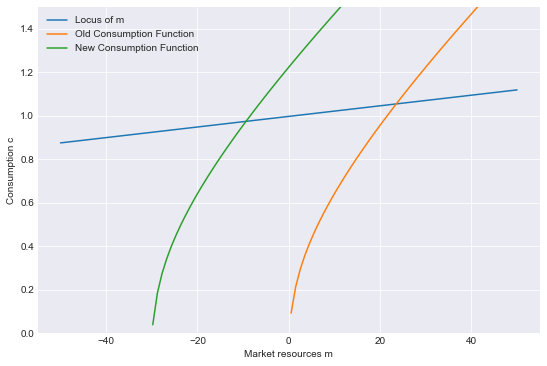

In [56]:
m_range=np.linspace(-50,50,num=100,endpoint=True)
plt.figure(figsize=(9,6)) # set the figure size
plt.ylim(0.,1.5)     
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label

# locus of m formula
m_locus = TBS.PermGroFac/(TBS.Rfree*(1-TBS.UnempPrb)) + m_range*(1.0-TBS.PermGroFac/(TBS.Rfree*(1-TBS.UnempPrb)))

# Plot the locus of m
plt.plot(m_range, m_locus, label='Locus of m')

# Plot consumption functions
plt.plot(m_range, TBS.solution[0].cFunc(m_range),label='Old Consumption Function')
plt.plot(m_range, TBS.solution[0].cFunc(m_range+30),label='New Consumption Function')

plt.legend()      
plt.show()

##### vi)

Without having any unemployment benefits, consumers are unable to borrow as they do not have any guaranteed future income. With unemployment benefits, that gives them a guaranteed future income, with which they can borrow against. This is the relaxation of the natural borrowing constraint.

#### b) Experiments

#### i) Experiment 1

In [57]:
#original
TBS_dictionary =  {'UnempPrb' : .005,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2}           # Coefficient of relative risk aversion
TBS = TractableConsumerType(**TBS_dictionary)
TBS.solve()

#probability of unemployment shock
TBS_dictionary1 =  {'UnempPrb' : .003,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2}           # Coefficient of relative risk aversion
TBS1 = TractableConsumerType(**TBS_dictionary1)
TBS1.solve()

#growth rate shock
TBS_dictionary2 =  {'UnempPrb' : .005,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0045,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2}           # Coefficient of relative risk aversion
TBS2 = TractableConsumerType(**TBS_dictionary2)
TBS2.solve()

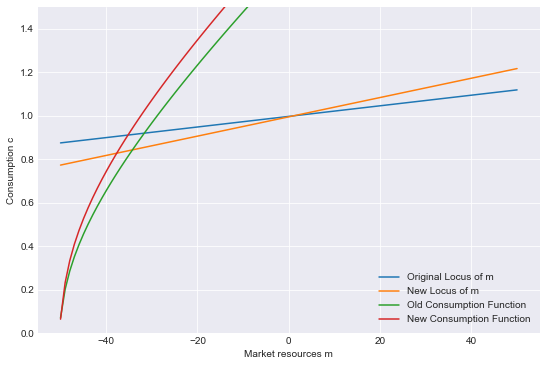

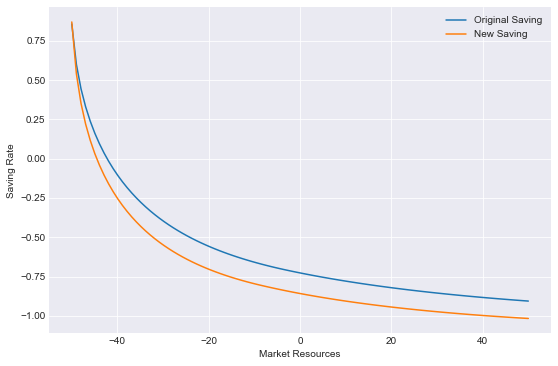

In [58]:
mMin=-50
mMax=50
uis=0.5 #unemployment insurance system
h=TBS.PermGroFac*uis/((TBS.Rfree-1)*(1-TBS.UnempPrb))
h1=TBS1.PermGroFac*uis/((TBS1.Rfree-1)*(1-TBS1.UnempPrb))
m_range=np.linspace(mMin,mMax,num=100,endpoint=True)

#Set up graph
plt.figure(figsize=(9,6)) 
plt.ylim(0.,1.5)   
plt.xlabel('Market resources m') 
plt.ylabel('Consumption c')     

#m locus formulas
m_locus = TBS.PermGroFac/(TBS.Rfree*(1-TBS.UnempPrb)) + m_range*(1.0-TBS.PermGroFac/(TBS.Rfree*(1-TBS.UnempPrb)))
m_locus1 = TBS1.PermGroFac/(TBS1.Rfree*(1-TBS1.UnempPrb)) + m_range*(1.0-TBS1.PermGroFac/(TBS1.Rfree*(1-TBS1.UnempPrb)))

# Plot the orginal locus of m
plt.plot(m_range, m_locus, label='Original Locus of m')

# Plot the new locus of m
plt.plot(m_range, m_locus1, label='New Locus of m')

# Plot the consumption
plt.plot(m_range, TBS.solution[0].cFunc(m_range+h),label='Old Consumption Function')
plt.plot(m_range, TBS1.solution[0].cFunc(m_range+h1),label='New Consumption Function')

plt.legend()      
plt.show()

# Plot the saving rates
plt.figure(figsize=(9,6)) 
plt.xlabel('Market Resources') 
plt.ylabel('Saving Rate') 
c_e = TBS.solution[0].cFunc(m_range+h)
c_e1= TBS1.solution[0].cFunc(m_range+h1)
saving=((TBS.Rfree-1)*m_range+1-TBS.Rfree*c_e)/((TBS.Rfree-1)*m_range+1) 
saving1=((TBS1.Rfree-1)*m_range+1-TBS1.Rfree*c_e1)/((TBS1.Rfree-1)*m_range+1) 
plt.plot(m_range, saving, label='Original Saving')
plt.plot(m_range, saving1,label='New Saving')
plt.legend()
plt.show()

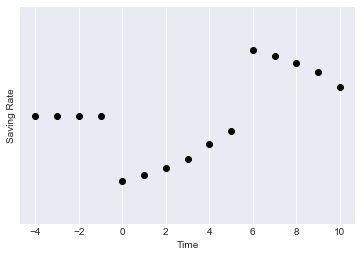

In [59]:
# Saving Rate Over Time
#Ignore Actual Values of x and y, just using them to make the drawing
x = [-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
y = [0,0,0,0,-.3, -.275, -.241, -.2, -.13, -.07,0.3,.275, .241, .2, .13]

plt.yticks([])
plt.ylim(-.5,.5)
plt.plot(x, y, 'o', color='black')
plt.xlabel('Time') # x axis label
plt.ylabel('Saving Rate') # y axis label
plt.show()

#### ii) Experiment 2

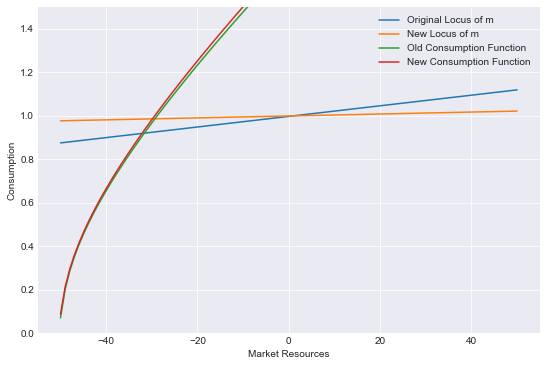

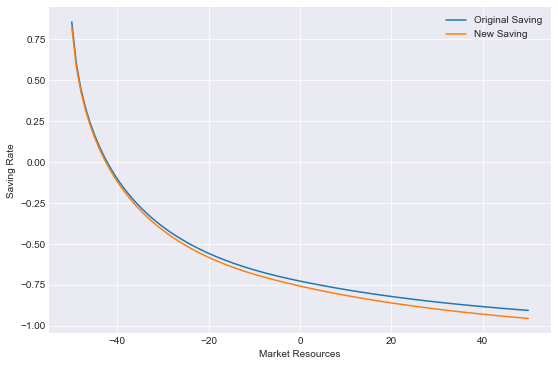

In [60]:
mMin=-50
mMax=50
uis=0.5
h2=TBS2.PermGroFac*uis/((TBS2.Rfree-1)*(1-TBS2.UnempPrb))
m_range=np.linspace(mMin,mMax,num=100,endpoint=True)

#Set up graph
plt.figure(figsize=(9,6))
plt.ylim(0.,1.5) 
plt.xlabel('Market Resources') 
plt.ylabel('Consumption')   

#m locus formulas
m_locus = TBS.PermGroFac/(TBS.Rfree*(1-TBS.UnempPrb)) + m_range*(1.0-TBS.PermGroFac/(TBS.Rfree*(1-TBS.UnempPrb)))
m_locus1 = TBS2.PermGroFac/(TBS2.Rfree*(1-TBS2.UnempPrb)) + m_range*(1.0-TBS2.PermGroFac/(TBS2.Rfree*(1-TBS2.UnempPrb)))

# Plot the orginal locus of m
plt.plot(m_range, m_locus, label='Original Locus of m')

# Plot the new locus of m
plt.plot(m_range, m_locus1, label='New Locus of m')

# Plot the consumptions
plt.plot(m_range, TBS.solution[0].cFunc(m_range+h),label='Old Consumption Function')
plt.plot(m_range, TBS2.solution[0].cFunc(m_range+h2),label='New Consumption Function')

plt.legend()      
plt.show()

# Plot the saving rates
plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('Market Resources') # x axis label
plt.ylabel('Saving Rate')      # y axis label
c_e = TBS.solution[0].cFunc(m_range+h)
c_e2= TBS2.solution[0].cFunc(m_range+h2)
saving=((TBS.Rfree-1)*m_range+1-TBS.Rfree*c_e)/((TBS.Rfree-1)*m_range+1) 
saving2=((TBS2.Rfree-1)*m_range+1-TBS2.Rfree*c_e2)/((TBS2.Rfree-1)*m_range+1) 
plt.plot(m_range, saving, label='Original Saving')
plt.plot(m_range, saving2,label='New Saving')
plt.legend()
plt.show()

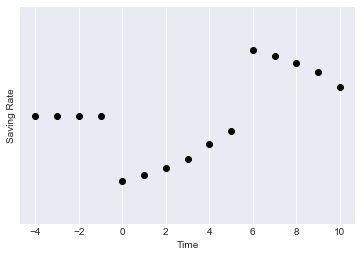

In [61]:
# Saving Rate Over Time
#Ignore Actual Values of x and y, just using them to make the drawing
x = [-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
y = [0,0,0,0,-.3, -.275, -.241, -.2, -.13, -.07,0.3,.275, .241, .2, .13]

plt.yticks([])
plt.ylim(-.5,.5)
plt.plot(x, y, 'o', color='black')
plt.xlabel('Time') # x axis label
plt.ylabel('Saving Rate') # y axis label
plt.show()

#### iii) Experiment 3

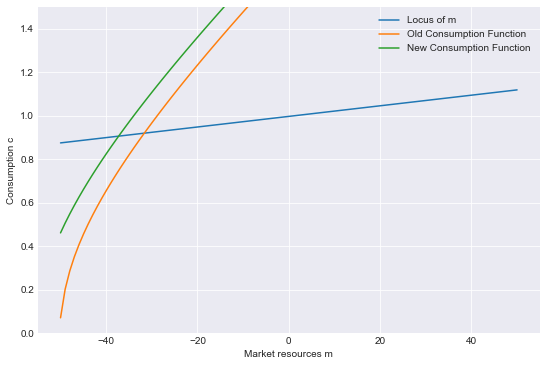

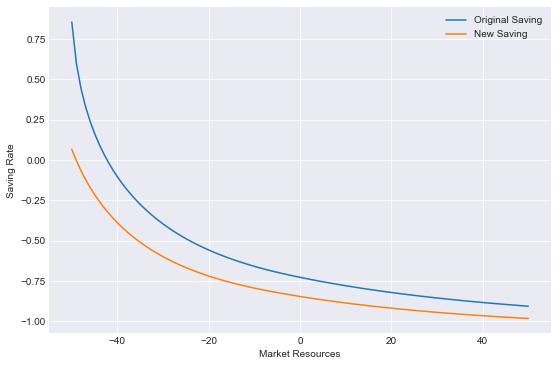

In [62]:
mMin=-50
mMax=50
uis3=0.55
h3=TBS2.PermGroFac*uis3/((TBS.Rfree-1)*(1-TBS.UnempPrb))
m_range=np.linspace(mMin,mMax,num=100,endpoint=True)

#Set up graph
plt.figure(figsize=(9,6)) 
plt.ylim(0.,1.5)   
plt.xlabel('Market resources m') 
plt.ylabel('Consumption c')   

#m locus formula
m_locus = TBS.PermGroFac/(TBS.Rfree*(1-TBS.UnempPrb)) + m_range*(1.0-TBS.PermGroFac/(TBS.Rfree*(1-TBS.UnempPrb)))

# Plot the locus of m
plt.plot(m_range, m_locus, label='Locus of m')

# Plot the consumptions
plt.plot(m_range, TBS.solution[0].cFunc(m_range+h),label='Old Consumption Function')
plt.plot(m_range, TBS.solution[0].cFunc(m_range+h3),label='New Consumption Function')

plt.legend()      
plt.show()

# Plot the saving rates
plt.figure(figsize=(9,6)) 
plt.xlabel('Market Resources') 
plt.ylabel('Saving Rate')      
c_e = TBS.solution[0].cFunc(m_range+h)
c_e3= TBS.solution[0].cFunc(m_range+h3)
saving=((TBS.Rfree-1)*m_range+1-TBS.Rfree*c_e)/((TBS.Rfree-1)*m_range+1) 
saving3=((TBS.Rfree-1)*m_range+1-TBS.Rfree*c_e3)/((TBS.Rfree-1)*m_range+1) 
plt.plot(m_range, saving, label='Original Saving')
plt.plot(m_range, saving3,label='New Saving')
plt.legend()
plt.show()

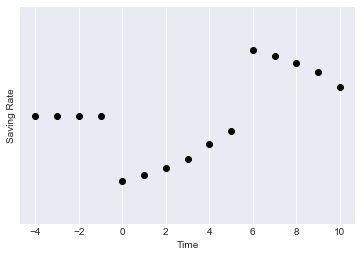

In [63]:
# Saving Rate Over Time
#Ignore Actual Values of x and y, just using them to make the drawing
x = [-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
y = [0,0,0,0,-.3, -.275, -.241, -.2, -.13, -.07,0.3,.275, .241, .2, .13]

plt.yticks([])
plt.ylim(-.5,.5)
plt.plot(x, y, 'o', color='black')
plt.xlabel('Time') # x axis label
plt.ylabel('Saving Rate') # y axis label
plt.show()

### 2. Asset Pricing in a Financial Crisis

#### a) One time permanent drop in the level of dividends per share of S to half the original level

From the Lucas model, we know that the price to dividend ratio is equal to the time preference factor. From the C-CAPM model, we know that for multiple assets, the rate of return on an asset is positively correlated with the future consumption and return of the asset.

With both of these, we will see that if the divdens per share of S is cut in half, then the price of S will also be cut in half to maintain the ratio between them, time preference factor. The price and the price dividend ratio of O will not be affected by this shock.

#### b) Variance of the S dividends is permanently higher.

Since there is a larger variance in S (i.e. S is riskier), the price of S needs to decrease. This is evident from the equation for return in the C-CAPM model.

This says that the price of S will decrease, so the price dividend ratio of S will also decrease. The price and the price dividend ratio of O will not be affected by this shock.

#### c) Increase in the level of risk aversion

The price of S and O will both go down as consumers will choose to move to a risk free asset. This will also cause their price dividend ratios to decrease.